In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('diabetic_data.csv') 

In [92]:
data.shape

(101766, 50)

In [93]:
data.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [94]:
data = data.replace('?', np.nan)

In [95]:
def convert_readmission(value):
  if value == '<30':
    return 1
  else:
    return 0

data['readmitted'] = data['readmitted'].apply(convert_readmission)

In [96]:
count_ones = data['readmitted'].sum()
print(count_ones)

11357


In [97]:
data['readmitted'] = data['readmitted'].astype(bool)
print(data.dtypes)

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [98]:
missing_percentages = data.isnull().sum() / len(data) * 100
columns_to_drop = missing_percentages[missing_percentages > 90].index
data = data.drop(columns_to_drop, axis=1)

In [99]:
no_variation_cols = ['examide', 'citoglipton']


# Drop all columns 
data = data.drop(no_variation_cols, axis=1) 
near_zero_variance_cols = ['repaglinide', 'nateglinide', 'chlorpropamide', 
                           'glimepiride', 'acetohexamide', 'tolbutamide', 
                           'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
                            'glyburide-metformin', 
                           'glipizide-metformin', 'glimepiride-pioglitazone', 
                           'metformin-rosiglitazone', 'metformin-pioglitazone']

data = data.drop(near_zero_variance_cols, axis=1) 

In [100]:
# columns_to_convert = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

# # Convert the specified columns to strings
# data[columns_to_convert] = data[columns_to_convert].astype(str)

# print(data.dtypes)

In [101]:
data.dropna(inplace=True)

In [102]:
data.shape

(26755, 32)

In [103]:
data = data.drop('encounter_id', axis=1)

In [104]:
data.isna().mean().sort_values(ascending=False).head()

patient_nbr    0.0
diag_1         0.0
diabetesMed    0.0
change         0.0
insulin        0.0
dtype: float64

Correlation Heatmap:


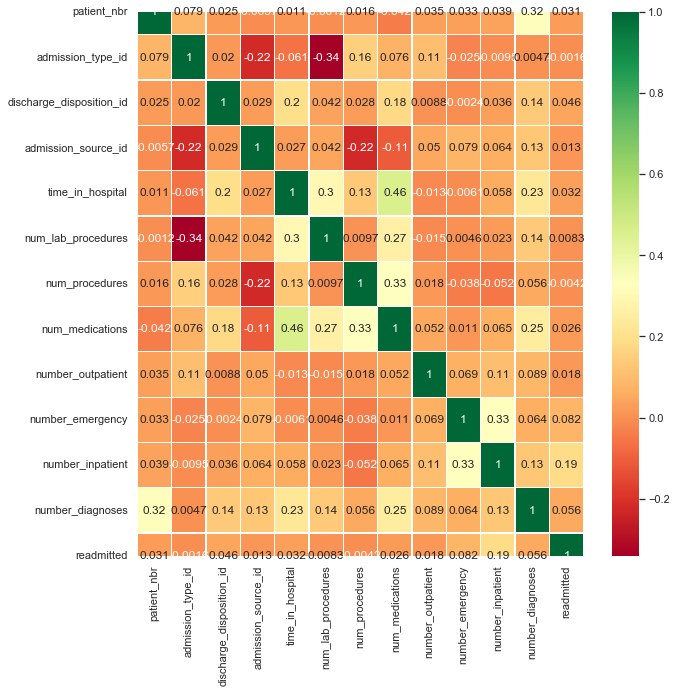

In [105]:
print("Correlation Heatmap:")
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()
print("\n")

In [106]:
def replace_age_ranges(feature):
  age_ranges = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)','[60-70)', '[70-80)', '[80-90)', '[90-100)']
  values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  
  # The function iterates through the age_ranges and replaces each occurrence in the 'feature' with the corresponding numerical value.
  for i, age_range in enumerate(age_ranges):
    feature = feature.replace(age_range, values[i])

  return feature
data['age']=replace_age_ranges(data['age'])

In [107]:
data['admission_type_id']=data['admission_type_id'].apply(lambda x : 5 if x in (6,8) else x)
data['admission_type_id']=data['admission_type_id'].apply(lambda x : 1 if x == 4 else 2 if x==7 else x )

In [108]:
#Discharged Home: 1, 6, 8
data['discharge_disposition_id']=data['discharge_disposition_id'].apply(lambda x : 1 if x in (6,8) else x)

#Uncategorized/Unknown: 18, 25, 26, 12
data['discharge_disposition_id']=data['discharge_disposition_id'].apply(lambda x : 18 if x in (25,26,12) else x)

#Expired:11, 19, 20, 21
data['discharge_disposition_id']=data['discharge_disposition_id'].apply(lambda x : 11 if x in (19,20,21) else x)

#Hospice:13, 14
data['discharge_disposition_id']=data['discharge_disposition_id'].apply(lambda x : 13 if x ==14 else x)

# Discharged/Transferred to Hospital: 2, 9, 10, 23, 27, 28, 29
data['discharge_disposition_id']=data['discharge_disposition_id'].apply(lambda x : 2 if x in ( 9, 10, 23, 27, 28, 29) else x)

In [109]:
#Discharged/Transferred to Care Facility: 3, 4, 5, 15, 24
data['discharge_disposition_id']=data['discharge_disposition_id'].apply(lambda x : 3 if x in ( 4, 5, 15, 24) else x)

#Discharged to Outpatient Services:16, 17
data['discharge_disposition_id']=data['discharge_disposition_id'].apply(lambda x : 16 if x ==17 else x)
# Unknown/Invalid: 9, 15, 17, 20, 21
data['admission_source_id']= data['admission_source_id'].apply(lambda x : 9 if x in (15, 17, 20, 21) else x)

# Physician/Clinic Referral:1, 2, 3
data['admission_source_id']= data['admission_source_id'].apply(lambda x : 1 if x in (2,3) else x)

In [110]:
#Transfer from Hospital: 4, 10, 22
data['admission_source_id']= data['admission_source_id'].apply(lambda x : 4 if x in (10,22) else x)


#Transfer from Facility:5, 6, 18, 19, 25, 26
data['admission_source_id']= data['admission_source_id'].apply(lambda x : 5 if x in (6, 18, 19, 25, 26) else x)

#Delivery:11, 12, 13, 14
data['admission_source_id']= data['admission_source_id'].apply(lambda x : 11 if x in (12, 13, 14) else x)

In [111]:
data['change']=data['change'].apply(lambda x: 'Yes' if x=='Ch' else x)

In [112]:
diag1_list=[]
diag2_list=[]
diag3_list=[]
# This function, diag_cluster, takes a column 'col' and a list 'diag_list' as inputs.
# It iterates through each value in the 'col' column of the DataFrame 'df' and assigns a cluster value based on certain conditions.
# The resulting cluster values are appended to the 'diag_list'.

def diag_cluster(col, diag_list):
    for x in data[col]:
        # If the value in the 'col' column contains 'V' or 'E', it is assigned a cluster value of 18.
        if 'V' in x or 'E' in x: 
            diag_list.append(18)
            continue
            # The following conditions assign cluster values based on specific ranges of float values.
        elif 1 <= float(x) <= 139:
            diag_list.append(1)
        elif 140 <= float(x) <= 239:
            diag_list.append(2)
        elif 240 <= float(x) <= 279:
            diag_list.append(3)
        elif 280 <= float(x) <= 289:
            diag_list.append(4)
        elif 290 <= float(x) <= 319:
            diag_list.append(5)
        elif 320 <= float(x) <= 389:
            diag_list.append(6)
        elif 390 <= float(x) <= 459:
            diag_list.append(7)
        elif 460 <= float(x) <= 519:
            diag_list.append(8)
        elif 520 <= float(x) <= 579:
            diag_list.append(9)
        elif 580 <= float(x) <= 629:
            diag_list.append(10)
        elif 630 <= float(x) <= 679:
            diag_list.append(11)
        elif 680 <= float(x) <= 709:
            diag_list.append(12)
        elif 710 <= float(x) <= 739:
            diag_list.append(13)
        elif 740 <= float(x) <= 759:
            diag_list.append(14)
        elif 760 <= float(x) <= 779:
            diag_list.append(15)
        elif 780 <= float(x) <= 799:
            diag_list.append(16)
        elif 800 <= float(x) <= 999:
            diag_list.append(17)
diag_cluster('diag_1',diag1_list)
diag_cluster('diag_2',diag2_list)
diag_cluster('diag_3',diag3_list)
data['diag_1']=diag1_list
data['diag_2']=diag2_list
data['diag_3']=diag3_list


In [113]:
data['gender']=data['change'].apply(lambda x: 0 if x=='Female' else 1)
data['change']=data['change'].apply(lambda x : 0 if x=='No' else 1)
data['diabetesMed']=data['diabetesMed'].apply(lambda x : 0 if x=='No' else 1)

In [114]:
data.drop_duplicates(subset='patient_nbr',keep='first',inplace=True)

In [115]:
data.shape

(19437, 31)

In [135]:
medicines = ['metformin',  'glipizide', 'glyburide',  'pioglitazone', 'rosiglitazone',  'insulin']

for col in medicines:
    data[col] = data[col].apply(lambda x: 0 if x == 'No' else 1)

In [136]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['race']=encoder.fit_transform(data['race'])

In [137]:
features = ['time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses']


C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated

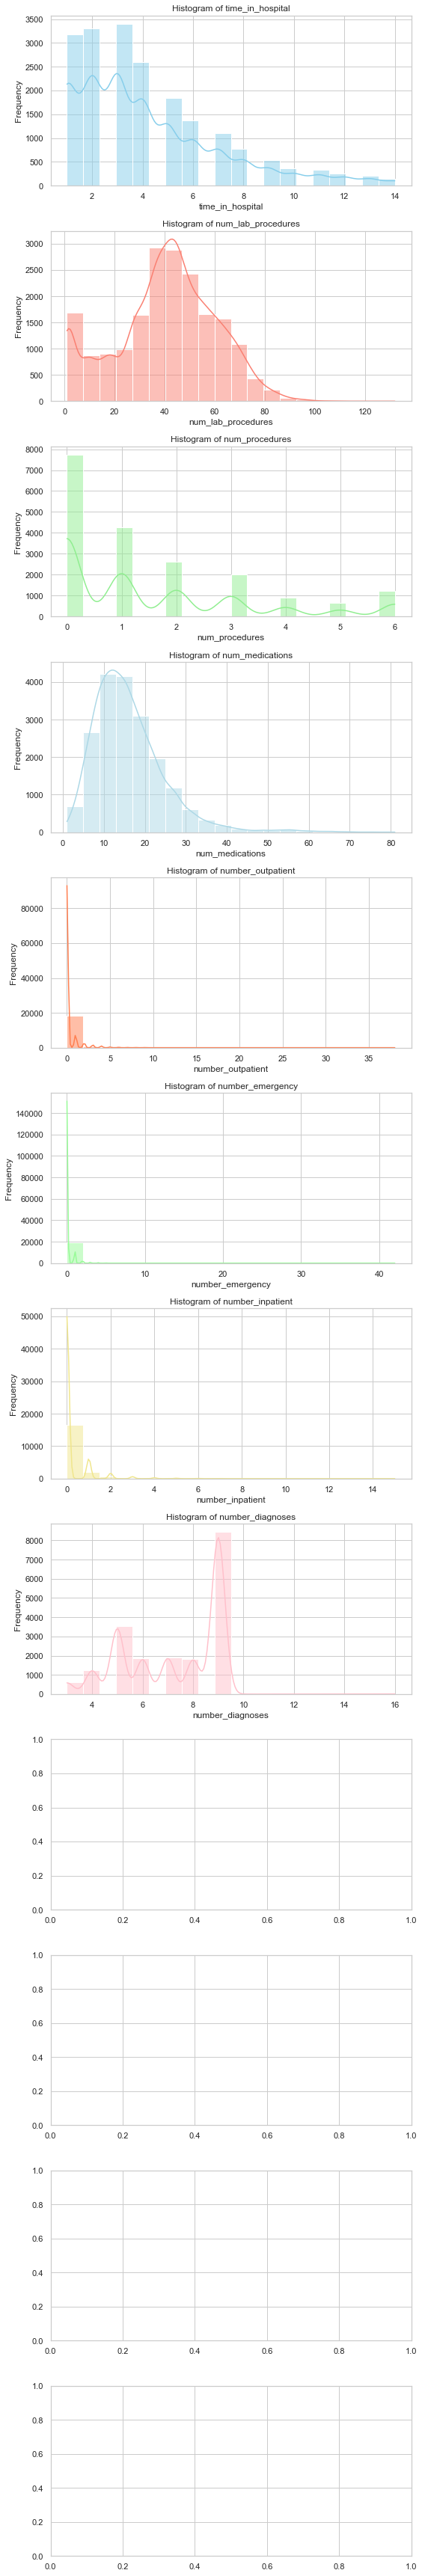

In [138]:
sns.set(style="whitegrid")

# Create a figure and axis to plot histograms for multiple features
fig, axs = plt.subplots(12, 1, figsize=(8, 48))  # Adjusted for the number of variables

# List of features to plot
features = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]

# Colors for the plots
colors = [
    'skyblue', 'salmon', 'lightgreen', 'lightblue', 'coral', 'palegreen',
    'khaki', 'pink', 'lightgrey', 'cyan', 'peachpuff', 'lavender'
]

# Loop through features and create histograms
for i, feature in enumerate(features):
    sns.histplot(data=data, x=feature, bins=20, kde=True, color=colors[i], ax=axs[i])
    axs[i].set_title(f'Histogram of {feature}')
    axs[i].set_xlabel(f'{feature}')
    axs[i].set_ylabel('Frequency')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

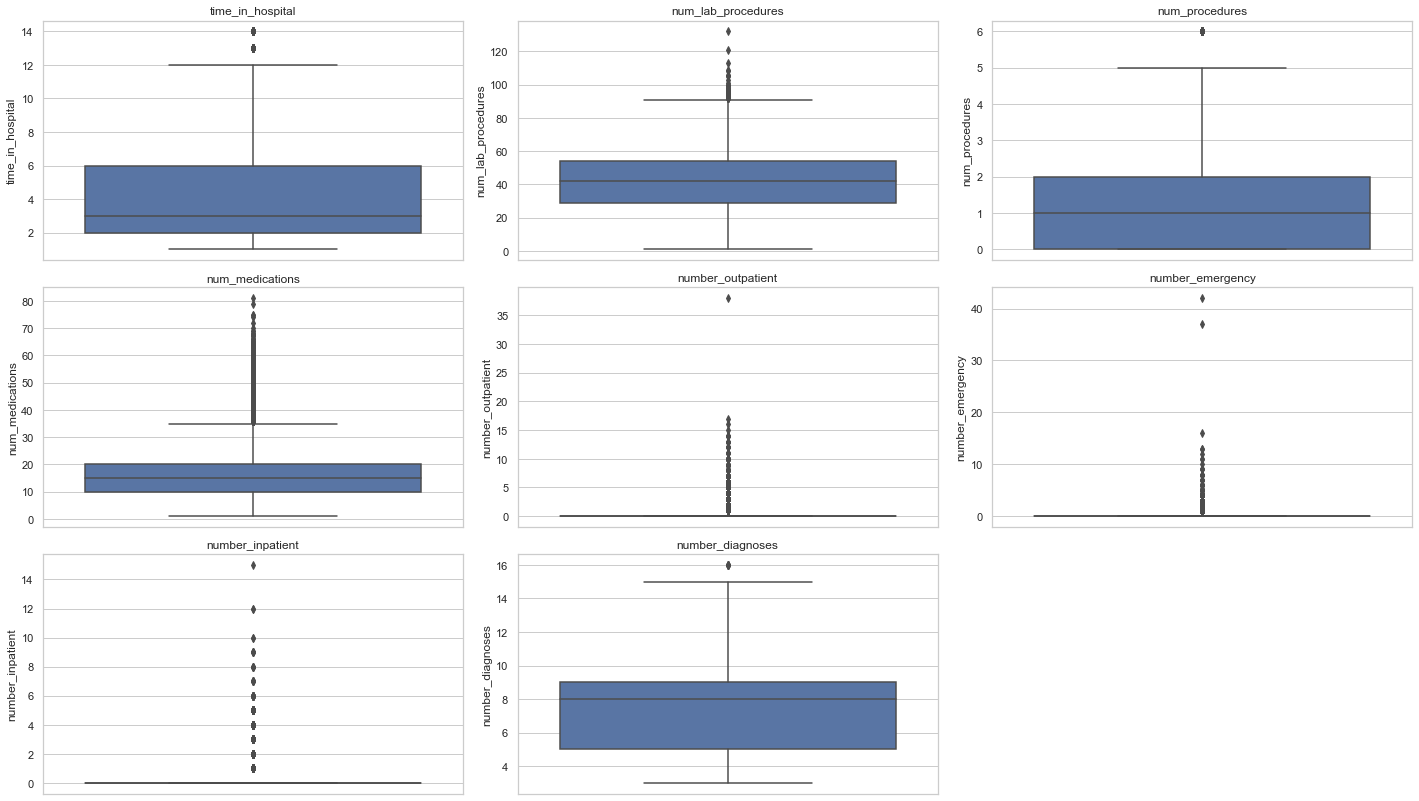

In [139]:
features_boxplot = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Plotting the boxplots for each feature separately
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_boxplot, start=1):
    plt.subplot(4, 3, i)  # Adjust the grid size according to the number of features
    sns.boxplot(y=data[feature])
    plt.title(feature)

plt.tight_layout()  # Adjust the layout to not overlap the plots
plt.show()

In [140]:
# List of features to apply Z-score method
z_score_features = ['num_lab_procedures' ]  # Assuming normal distribution

# List of features to apply IQR method
iqr_features = [ 'num_medications','time_in_hospital', 'num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']


In [141]:
diabetic_data_outliers_handled = data.copy()
# Apply Z-score method for assumed normal distribution features
for feature in z_score_features:
    z_scores = np.abs(stats.zscore(diabetic_data_outliers_handled[feature]))
    filtered_entries = (z_scores < 3)  # Filtering out data points that are more than 3 standard deviations away
    diabetic_data_outliers_handled = diabetic_data_outliers_handled[filtered_entries]

# Apply IQR method for skewed distribution features
for feature in iqr_features:
    Q1 = diabetic_data_outliers_handled[feature].quantile(0.25)
    Q3 = diabetic_data_outliers_handled[feature].quantile(0.75)
    IQR = Q3 - Q1
    filtered_entries = ((diabetic_data_outliers_handled[feature] >= (Q1 - 1.5 * IQR)) & 
                        (diabetic_data_outliers_handled[feature] <= (Q3 + 1.5 * IQR)))
    diabetic_data_outliers_handled = diabetic_data_outliers_handled[filtered_entries]

# Calculate the final size of the dataset after outlier handling
final_data_size_outliers_handled = len(diabetic_data_outliers_handled) / len(data) * 100

final_data_size_outliers_handled

60.86330194988938

In [142]:
diabetic_data_outliers_handled.shape

(11830, 31)

In [143]:
# f_cleaned = diabetic_data_outliers_handled.copy()  
# # Features to be normalized
# features_normalize = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
#                       'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Fit and transform the features using .loc for proper setting
# diabetic_data_outliers_handled.loc[:, features_normalize] = scaler.fit_transform(diabetic_data_outliers_handled[features_normalize])

# # Now df_cleaned should be modified without affecting the original and without warning
# print(diabetic_data_outliers_handled[features_normalize].head())

In [144]:
diabetic_data_outliers_handled.shape

(11830, 31)

In [145]:
f_cleaned.to_csv("DataCleaning1_AMS.csv", index=False)

In [146]:
count_ones = f_cleaned['readmitted'].sum()
print(count_ones)

912
